# Data Pre-processing : Cleaning & Transformation

# Data Cleaning

For the preprocessing we will first find the datatypes of the columns of our dataframe, and then drop the 
unneccessary columns.

In [ ]:
import pandas as pd
import matplotlib.pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [111]:
product_dfv1=pd.read_csv("https://raw.githubusercontent.com/Vakiti/SkinTelligence-Navigating-The-Amazon-Skincare-Universe/datasets/final_dataset.csv")
product_dfv1

,ASIN,product_name,price,listPrice,detailPageURL,rating,totalReviews,product_company,isPrimeEligible,Category,ingredients,highlights
0,B0C2NBW5LM,yopela 14 pack natural lip balm in bulk with ...,5.59,NaN,https://www.amazon.com/dp/B0C2NBW5LM,4.3,311.0,yopela,1.0,lipbalm,Not found,Not found
1,B0B43WPH44,#ootd vegan hydrating korean face mask sheet p...,33.90,NaN,https://www.amazon.com/dp/B0B43WPH44,4.5,381.0,#ootd,1.0,sheet mask,Not found,Not found
2,B083QCJPDD,beauty of joseon centella asiatica calming mas...,15.52,25.00,https://www.amazon.com/dp/B083QCJPDD,4.5,135.0,beauty of joseon,1.0,sheet mask,Not found,Not found
3,B0B3R661JP,beauty of joseon radiance cleansing balm (100m...,17.10,19.00,https://www.amazon.com/dp/B0B3R661JP,4.6,302.0,beauty of joseon,1.0,cleansing oil,Not found,Not found
4,B00OZ6W8DW,cosrx salicylic acid daily gentle cleanser 150...,13.99,NaN,https://www.amazon.com/dp/B00OZ6W8DW,4.6,1581.0,cosrx,1.0,cleanser,Not found,Not found
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,B0BQ3R8LH7,zeoclay face mask - 100% organic spa quality -...,38.24,44.99,https://www.amazon.com/dp/B0BQ3R8LH7,5.0,20.0,zeoclay,1.0,clay mask,Not found,Not found
1234,B07S472V7D,zo skin health gentle cleanser 6.7 fl. oz.,36.90,40.97,https://www.amazon.com/dp/B07S472V7D,4.7,606.0,zo skin health,1.0,cleanser,Not found,Not found
1235,B0150GNTQK,zum face sugar facial scrub - lemongrass - 4 oz,15.25,NaN,https://www.amazon.com/dp/B0150GNTQK,4.5,166.0,zum,1.0,face scrub,Not found,Not found
1236,B07P8ZN5JS,𝗧𝗢𝗣 𝟮𝟬𝟮𝟯* hyaluronic acid face serum - 2.5% pu...,9.99,11.99,https://www.amazon.com/dp/B07P8ZN5JS,4.3,24024.0,eclat skincare,1.0,serum,Not found,Not found


In [112]:
product_dfv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ASIN             1238 non-null   object 
 1   product_name     1238 non-null   object 
 2   price            1236 non-null   float64
 3   listPrice        529 non-null    float64
 4   detailPageURL    1238 non-null   object 
 5   rating           1206 non-null   float64
 6   totalReviews     1206 non-null   float64
 7   product_company  1238 non-null   object 
 8   isPrimeEligible  1236 non-null   float64
 9   Category         1238 non-null   object 
 10  ingredients      1238 non-null   object 
 11  highlights       1238 non-null   object 
dtypes: float64(5), object(7)
memory usage: 116.2+ KB


In [113]:
product_dfv1=product_dfv1.drop(columns=['ASIN','detailPageURL','ingredients', 'highlights'], axis=1)
product_dfv1

,product_name,price,listPrice,rating,totalReviews,product_company,isPrimeEligible,Category
0,yopela 14 pack natural lip balm in bulk with ...,5.59,NaN,4.3,311.0,yopela,1.0,lipbalm
1,#ootd vegan hydrating korean face mask sheet p...,33.90,NaN,4.5,381.0,#ootd,1.0,sheet mask
2,beauty of joseon centella asiatica calming mas...,15.52,25.00,4.5,135.0,beauty of joseon,1.0,sheet mask
3,beauty of joseon radiance cleansing balm (100m...,17.10,19.00,4.6,302.0,beauty of joseon,1.0,cleansing oil
4,cosrx salicylic acid daily gentle cleanser 150...,13.99,NaN,4.6,1581.0,cosrx,1.0,cleanser
...,...,...,...,...,...,...,...,...
1233,zeoclay face mask - 100% organic spa quality -...,38.24,44.99,5.0,20.0,zeoclay,1.0,clay mask
1234,zo skin health gentle cleanser 6.7 fl. oz.,36.90,40.97,4.7,606.0,zo skin health,1.0,cleanser
1235,zum face sugar facial scrub - lemongrass - 4 oz,15.25,NaN,4.5,166.0,zum,1.0,face scrub
1236,𝗧𝗢𝗣 𝟮𝟬𝟮𝟯* hyaluronic acid face serum - 2.5% pu...,9.99,11.99,4.3,24024.0,eclat skincare,1.0,serum


After dropping the columns named 'ASIN','detailPageURL','ingredients', and 'highlights', we will check for missing and duplicate values.

In [114]:
# Data Cleaning
product_dfv1.duplicated().sum()

0

In [115]:
product_dfv1.isnull().sum()

product_name         0
price                2
listPrice          709
rating              32
totalReviews        32
product_company      0
isPrimeEligible      2
Category             0
dtype: int64

In [116]:
product_dfv2=product_dfv1.copy()
product_dfv2

,product_name,price,listPrice,rating,totalReviews,product_company,isPrimeEligible,Category
0,yopela 14 pack natural lip balm in bulk with ...,5.59,NaN,4.3,311.0,yopela,1.0,lipbalm
1,#ootd vegan hydrating korean face mask sheet p...,33.90,NaN,4.5,381.0,#ootd,1.0,sheet mask
2,beauty of joseon centella asiatica calming mas...,15.52,25.00,4.5,135.0,beauty of joseon,1.0,sheet mask
3,beauty of joseon radiance cleansing balm (100m...,17.10,19.00,4.6,302.0,beauty of joseon,1.0,cleansing oil
4,cosrx salicylic acid daily gentle cleanser 150...,13.99,NaN,4.6,1581.0,cosrx,1.0,cleanser
...,...,...,...,...,...,...,...,...
1233,zeoclay face mask - 100% organic spa quality -...,38.24,44.99,5.0,20.0,zeoclay,1.0,clay mask
1234,zo skin health gentle cleanser 6.7 fl. oz.,36.90,40.97,4.7,606.0,zo skin health,1.0,cleanser
1235,zum face sugar facial scrub - lemongrass - 4 oz,15.25,NaN,4.5,166.0,zum,1.0,face scrub
1236,𝗧𝗢𝗣 𝟮𝟬𝟮𝟯* hyaluronic acid face serum - 2.5% pu...,9.99,11.99,4.3,24024.0,eclat skincare,1.0,serum


Looks like 'listPrice' column has 709 values. It is not possible to delete them without incurring data loss. However, we can use the available data to provide a representative estimate of the average difference, and then use this estimate to fill in missing 'listPrice' values. This method should provide reasonable imputations for missing 'listPrice' values.

In [118]:
# Calculate the average difference between price and listPrice
average_difference = product_dfv2.loc[product_dfv2['listPrice'].notnull(), 'listPrice'].mean() - product_dfv2.loc[product_dfv2['listPrice'].notnull(), 'price'].mean()

# Define a function to fill missing listPrice values
def fill_missing_listPrice(row):
    if pd.notnull(row['listPrice']):
        return row['listPrice']
    else:
        return row['price'] + average_difference

# Apply the function to fill missing listPrice values
product_dfv2['listPrice'] = product_dfv2.apply(fill_missing_listPrice, axis=1)
product_dfv2['listPrice']=product_dfv2['listPrice']. round(2) 
# Now, your DataFrame should have the missing listPrice values filled based on the calculated average difference.


In [ ]:
product_dfv2 = product_dfv2.dropna(subset=['price', 'rating','totalReviews'])

In [124]:
product_dfv2.isna().sum()

product_name       0
price              0
listPrice          0
rating             0
totalReviews       0
product_company    0
isPrimeEligible    0
Category           0
dtype: int64

Unfortunately, it is not possible to impute the missing values in the 'rating' and 'totalReviews' columns as their missing values coincide with eachother. This implies that products having a missing value in the 'rating' column have a missing value in the 'totalReviews' column as well. Let us check for this through code:

In [125]:
missing_rating = product_dfv2['rating'].isna()
missing_reviews = product_dfv2['totalReviews'].isna()

missing_both = missing_rating & missing_reviews

products_with_missing_both = product_dfv2[missing_both]

# Display the products with missing values in both 'rating' and 'totalReviews'
products_with_missing_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_name     0 non-null      object 
 1   price            0 non-null      float64
 2   listPrice        0 non-null      float64
 3   rating           0 non-null      float64
 4   totalReviews     0 non-null      float64
 5   product_company  0 non-null      object 
 6   isPrimeEligible  0 non-null      float64
 7   Category         0 non-null      object 
dtypes: float64(5), object(3)
memory usage: 0.0+ bytes


Looks like we're correct. So let us just remove the rows corresponding to these missing values. 

## Transformation

price: p-value = 0.0


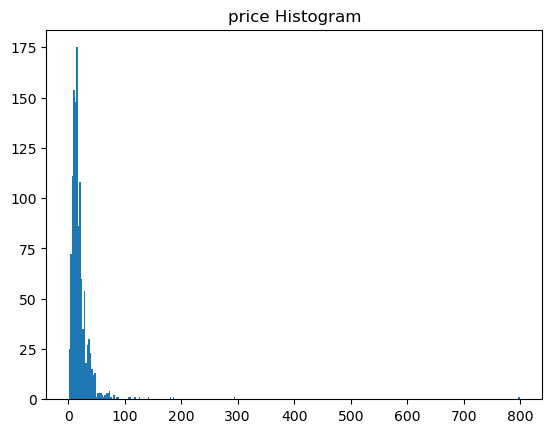

listPrice: p-value = 0.0


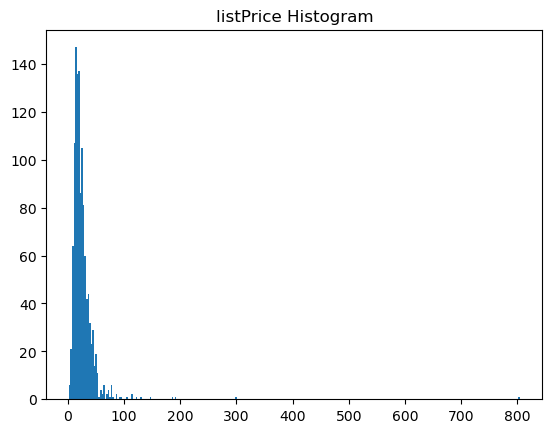

rating: p-value = 6.127652631491607e-37


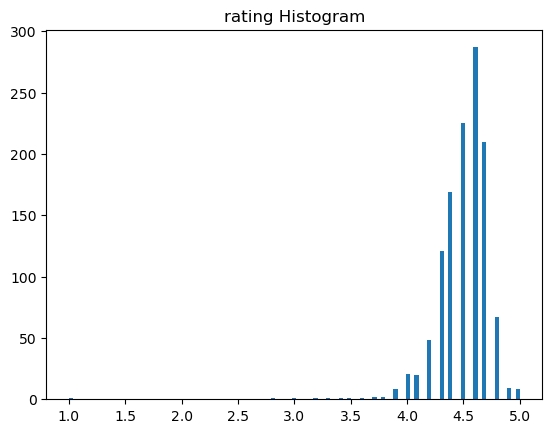

totalReviews: p-value = 0.0


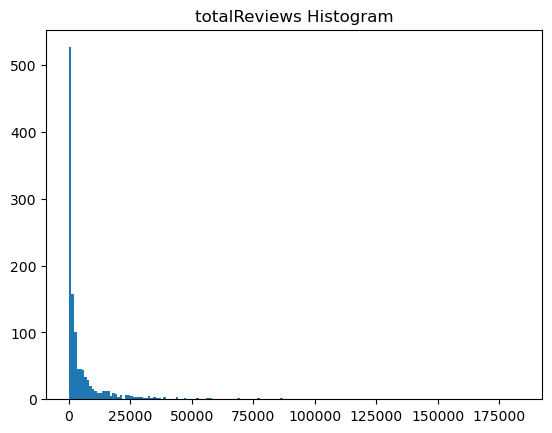

isPrimeEligible: p-value = 0.0


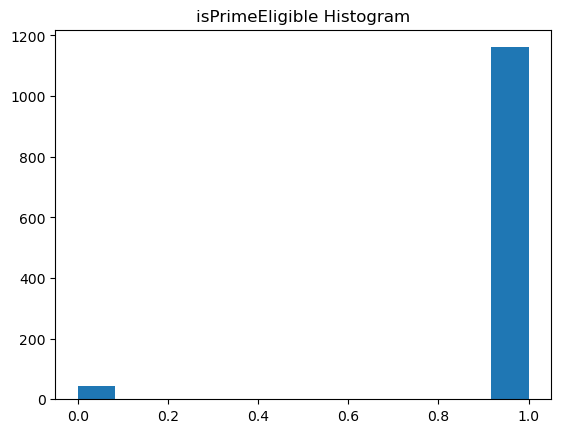

In [132]:
from scipy import stats
import matplotlib.pyplot as plt

# Define the columns you want to create histograms for
columns_to_plot = ['price', 'listPrice', 'rating', 'totalReviews', 'isPrimeEligible']

# Loop through the selected columns and create histograms
for column in columns_to_plot:
    feature = product_dfv2[column].dropna()
    
    # Shapiro-Wilk test for normality
    stat, p = stats.shapiro(feature)
    print(f"{column}: p-value = {p}")
    
    # Create a histogram
    plt.figure()
    plt.hist(feature, bins='auto')
    plt.title(f"{column} Histogram")
    plt.show()

price: p-value = 0.0
listPrice: p-value = 0.0
rating: p-value = 6.127652631491607e-37
totalReviews: p-value = 0.0
isPrimeEligible: p-value = 0.0


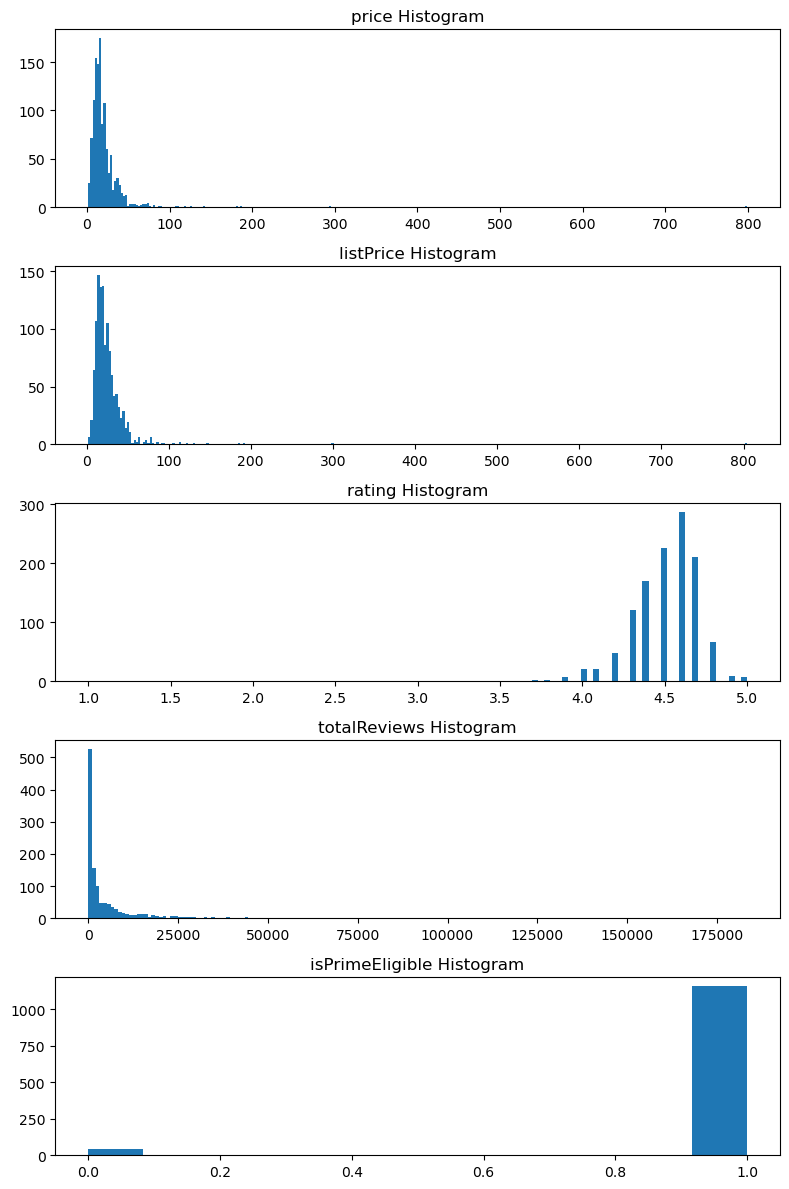

In [170]:
from scipy import stats
import matplotlib.pyplot as plt

# Define the columns you want to create histograms for
columns_to_plot = ['price', 'listPrice', 'rating', 'totalReviews', 'isPrimeEligible']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 12))

# Loop through the selected columns and create histograms
for i, column in enumerate(columns_to_plot):
    feature = product_dfv2[column].dropna()
    
    # Shapiro-Wilk test for normality
    stat, p = stats.shapiro(feature)
    print(f"{column}: p-value = {p}")
    
    # Create a histogram
    axes[i].hist(feature, bins='auto')
    axes[i].set_title(f"{column} Histogram")

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of histograms
plt.show()



A p-value of 0 or a very small value (e.g., 6.127652631491607e-37) suggests that our data significantly deviates from
a normal distribution. In statistical terms, this means that our data is not normally distributed. Therefore, for Gaussian
Naive Bayes, which assumes normally distributed features, using this data as-is is not appropriate.

Since this data is not normally distributed, we might consider using other types of Naive Bayes or applying transformations
to make our data more suitable for modeling.

Right-skewed:price, listPrice, totalReviews
Left-skewed: rating
Binary: isPrimeEligible

In [140]:
product_dfv3=product_dfv2.copy()

In [141]:
import numpy as np
product_dfv3['price'] = np.log1p(product_dfv3['price'])
product_dfv3['listPrice'] = np.log1p(product_dfv3['listPrice'])
product_dfv3['totalReviews'] = np.log1p(product_dfv3['totalReviews'])
product_dfv3['rating'] = np.exp(product_dfv3['rating'])

price: p-value = 3.813606375135947e-11


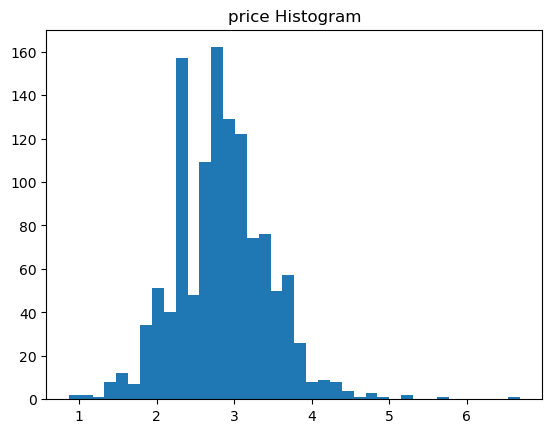

listPrice: p-value = 1.0556804996147973e-12


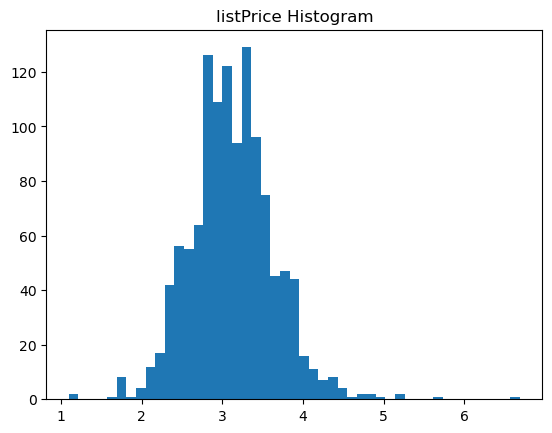

rating: p-value = 1.6062436325654782e-17


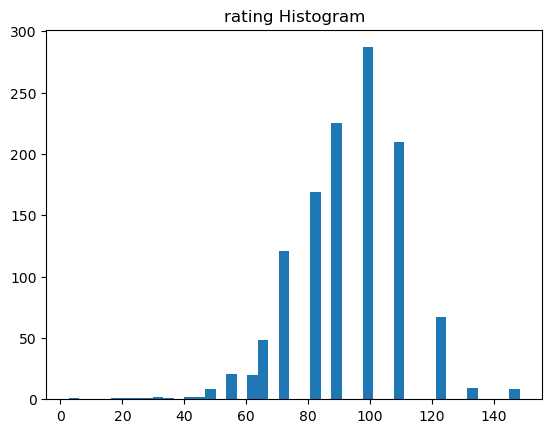

totalReviews: p-value = 4.175594536803828e-09


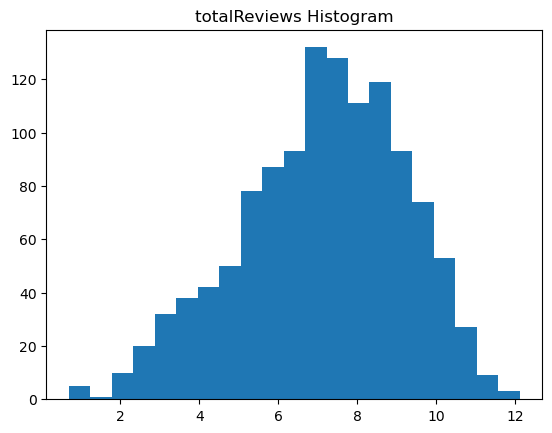

isPrimeEligible: p-value = 0.0


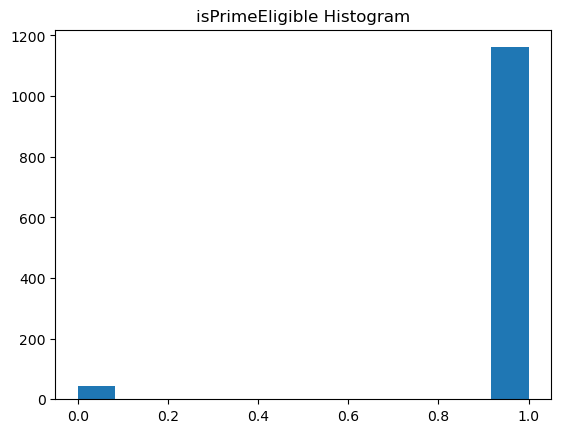

In [142]:
from scipy import stats
import matplotlib.pyplot as plt

# Define the columns you want to create histograms for
columns_to_plot = ['price', 'listPrice', 'rating', 'totalReviews', 'isPrimeEligible']

# Loop through the selected columns and create histograms
for column in columns_to_plot:
    feature = product_dfv3[column].dropna()
    
    # Shapiro-Wilk test for normality
    stat, p = stats.shapiro(feature)
    print(f"{column}: p-value = {p}")
    
    # Create a histogram
    plt.figure()
    plt.hist(feature, bins='auto')
    plt.title(f"{column} Histogram")
    plt.show()

price: p-value = 3.813606375135947e-11
listPrice: p-value = 1.0556804996147973e-12
rating: p-value = 1.6062436325654782e-17
totalReviews: p-value = 4.175594536803828e-09
isPrimeEligible: p-value = 0.0


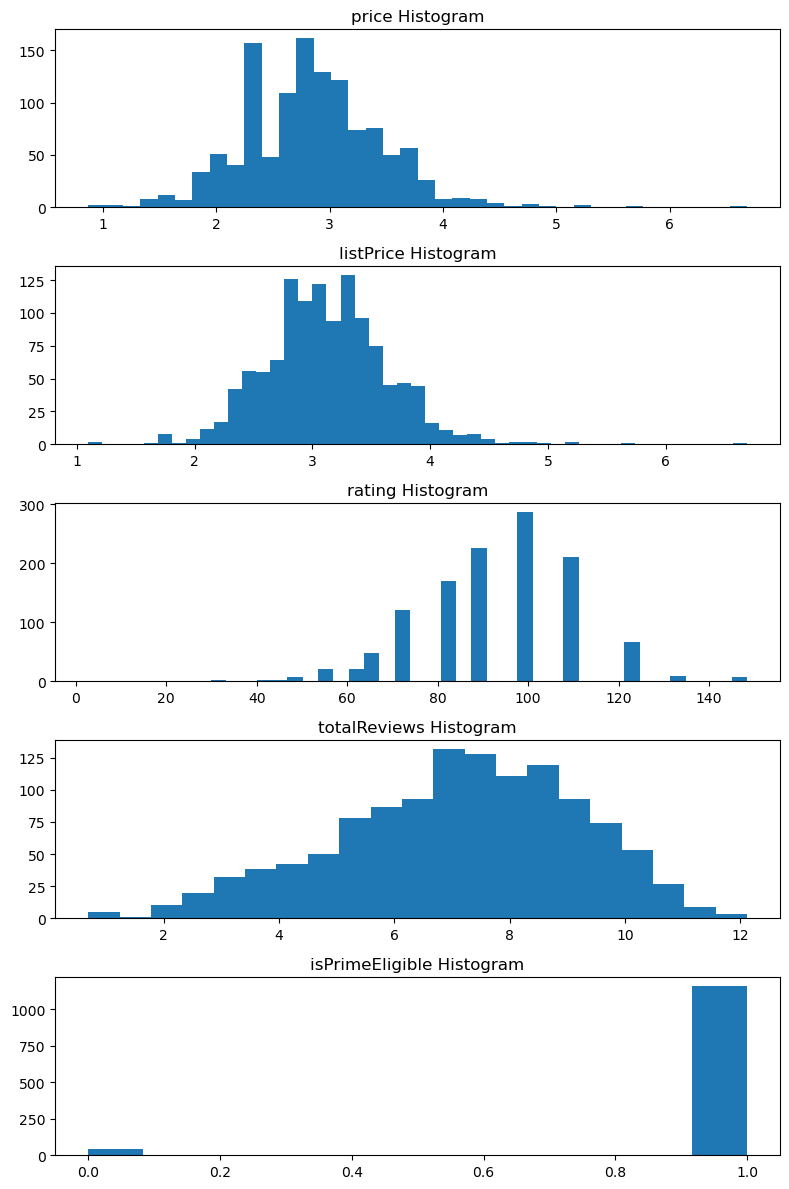

In [168]:
from scipy import stats
import matplotlib.pyplot as plt

# Define the columns you want to create histograms for
columns_to_plot = ['price', 'listPrice', 'rating', 'totalReviews', 'isPrimeEligible']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 12))

# Loop through the selected columns and create histograms
for i, column in enumerate(columns_to_plot):
    feature = product_dfv3[column].dropna()
    
    # Shapiro-Wilk test for normality
    stat, p = stats.shapiro(feature)
    print(f"{column}: p-value = {p}")
    
    # Create a histogram
    axes[i].hist(feature, bins='auto')
    axes[i].set_title(f"{column} Histogram")

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of histograms
plt.show()


After applying the data transformations, the p-values from the Shapiro-Wilk test for normality are now above 0 
(indicating that the data is more normally distributed), it means our data is closer to a normal distribution, 
which is typically an assumption for Multinomial Naive Bayes method.

Now it is time to implement 3 types of Naive Bayes: Gaussian, Multinomial, and Bernoulli without any data transformations. We can take 3 main problem statements to implement these methods:

1. Price Prediction: Is it possible to classify the price range (e.g., low, medium, high) of a product based on its ratings, the number of reviews, and other continuous features?--GaussianNB

2. Prime Eligibility Classification: Is it possible to classify a product as prime eligible or not based on features?

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Calculate the average price
avg_price = product_dfv3['price'].mean()

# Define the price ranges based on average thresholds
def categorize_price(price, avg_price):
    if price < avg_price:
        return 'low'
    elif price < 2 * avg_price:
        return 'medium'
    else:
        return 'high'

# Apply the categorization function to create a new 'price_range' column
product_dfv3['price_range'] = product_dfv3.apply(lambda row: categorize_price(row['price'], avg_price), axis=1)

In [145]:
product_dfv3

,product_name,price,listPrice,rating,totalReviews,product_company,isPrimeEligible,Category,price_range
0,yopela 14 pack natural lip balm in bulk with ...,1.885553,2.476538,73.699794,5.743003,yopela,1.0,lipbalm,low
1,#ootd vegan hydrating korean face mask sheet p...,3.552487,3.694116,90.017131,5.945421,#ootd,1.0,sheet mask,medium
2,beauty of joseon centella asiatica calming mas...,2.804572,3.258097,90.017131,4.912655,beauty of joseon,1.0,sheet mask,low
3,beauty of joseon radiance cleansing balm (100m...,2.895912,2.995732,99.484316,5.713733,beauty of joseon,1.0,cleansing oil,medium
4,cosrx salicylic acid daily gentle cleanser 150...,2.707383,3.010621,99.484316,7.366445,cosrx,1.0,cleanser,low
...,...,...,...,...,...,...,...,...,...
1233,zeoclay face mask - 100% organic spa quality -...,3.669697,3.828424,148.413159,3.044522,zeoclay,1.0,clay mask,medium
1234,zo skin health gentle cleanser 6.7 fl. oz.,3.634951,3.736955,109.947172,6.408529,zo skin health,1.0,cleanser,medium
1235,zum face sugar facial scrub - lemongrass - 4 oz,2.788093,3.070840,90.017131,5.117994,zum,1.0,face scrub,low
1236,𝗧𝗢𝗣 𝟮𝟬𝟮𝟯* hyaluronic acid face serum - 2.5% pu...,2.396986,2.564180,73.699794,10.086850,eclat skincare,1.0,serum,low


Accuracy: 0.9543568464730291


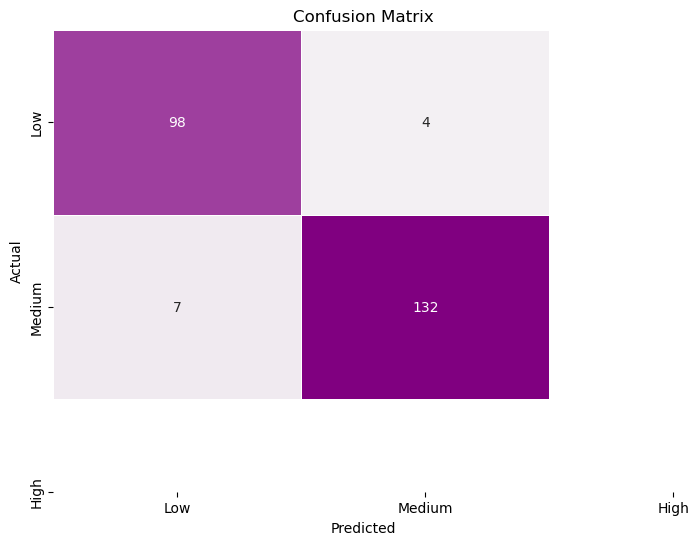

In [153]:
# Define the features (attributes) for prediction
# In this case, we are using 'rating', 'totalReviews', and other continuous features
features = ['rating', 'totalReviews', 'price', 'listPrice']  # Add relevant continuous features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(product_dfv3[features], product_dfv3['price_range'], test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define a custom color map with better contrast
cmap = sns.light_palette("purple", as_cmap=True)

# Plot the confusion matrix with improved visibility
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"], linewidths=.5, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [167]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=["Low", "Medium"])

# Print the classification report
print(report)

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         6
      Medium       0.98      1.00      0.99       235

    accuracy                           0.98       241
   macro avg       0.49      0.50      0.49       241
weighted avg       0.95      0.98      0.96       241



C:\Users\vakit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vakit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vakit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In summary, the model performed well in predicting "Medium" products with high accuracy, but it struggles to predict "Low" products. The overall performance is good when considering the weighted average, but it's important to understand the specific challenges with individual classes.

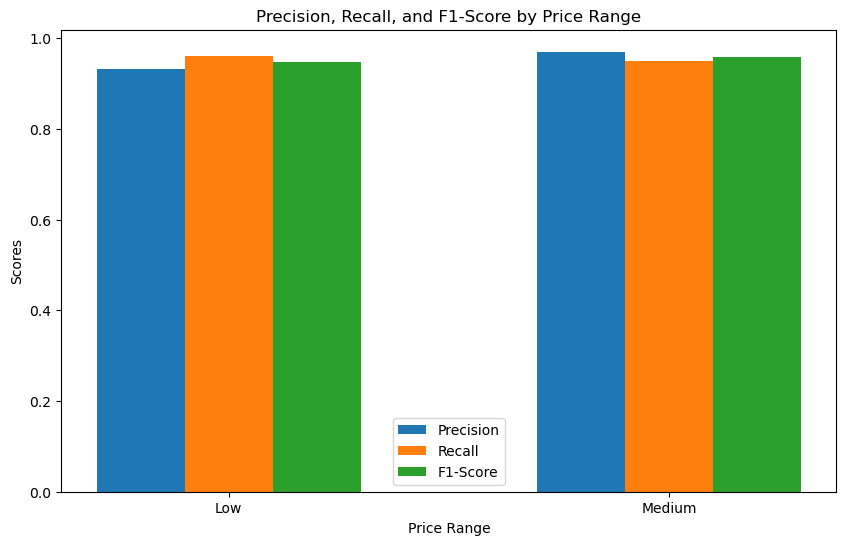

In [163]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=["Low", "Medium"], output_dict=True)

# Extract the metrics
precision = [report["Low"]["precision"], report["Medium"]["precision"]]
recall = [report["Low"]["recall"], report["Medium"]["recall"]]
f1_score = [report["Low"]["f1-score"], report["Medium"]["f1-score"]]
categories = ["Low", "Medium"]

# Plot precision, recall, and F1-score
x = range(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x, precision, width, label="Precision")
bar2 = ax.bar([i + width for i in x], recall, width, label="Recall")
bar3 = ax.bar([i + 2 * width for i in x], f1_score, width, label="F1-Score")

ax.set_xlabel("Price Range")
ax.set_ylabel("Scores")
ax.set_title("Precision, Recall, and F1-Score by Price Range")
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

"High" category in the confusion matrix is still not clearly visible, it might be due to class imbalance where there are very few instances of the "High" class compared to "Low" and "Medium." 

In the accuracy report for the Gaussian Naive Bayes model, two distinct classes, "Low" and "Medium," were observed, constituting a binary classification problem. Essential evaluation metrics for determining the model's ability to accurately classify products into these categories included precision and recall. For "Low" products, a precision of 0.00 was demonstrated, signifying that no correct positive predictions were made for this class. This indicated that products had been categorized as "Low" by the model, resulting in almost entirely incorrect classifications. Conversely, for "Medium" products, a precision of 0.98 was exhibited, suggesting that a significant majority of the products classified as "Medium" by the model were indeed "Medium" products. However, precision alone did not present a comprehensive perspective on model performance.

Regarding recall, it was found that the model's performance displayed significant disparities. The recall for "Low" products was 0.00, signifying that the model had failed to correctly identify any "Low" products. In contrast, for "Medium" products, a recall of 1.00 was achieved, indicating the successful recognition of all "Medium" products by the model. This significant discrepancy underscored a pivotal facet of the model's performance. While it had excelled in accurately classifying "Medium" products, it had encountered considerable difficulties when dealing with "Low" products. The F1-score, which harmonized precision and recall, had echoed this sentiment. The F1-score for "Low" had been 0.00, highlighting the absence of true positives in this category, while the F1-score for "Medium" had reached a robust 0.99, indicating the proficiency of the model in predicting this class. In conclusion, the Gaussian Naive Bayes model had showcased strong classification performance for "Medium" products but had faced significant challenges with "Low" products, resulting in an accuracy report characterized by a considerable gap in performance between the two classes.